In [2]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import xarray as xr
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from joblib import parallel_backend

from woodland_tuning_plots import *
from dataset_rejigging_funcs import *
from random_forest_running_funcs import *

plt.ion()


#====================

# Read in the datasets, NB xr.open_dataset is a pointer to the data
# get the subsets:
# UKCEH - area
# S2 bands 2-8, 11, 12
# TODO -  start with 1 season but move on to all 4 

ukceh_data = xr.open_dataset("data/ukregion-northeastengland.tif",engine="rasterio")
s2_data = xr.open_dataset("data/2020_Jan_Mar-0000000000-0000000000.tif",engine="rasterio")

# get the edge co-ords of the grids of the 2 datasets. 
ukceh_corners = get_corners(ukceh_data)
s2_corners = get_corners(s2_data)



2023-10-16 16:58:53.302150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 16:58:53.856336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 16:58:53.860366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 16:58:55.604279: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# flatten the datasets

s2_dims,s2_flat = select_bands_areas(s2_data,s2_corners,[2,3,4,5,6,7,8,11,12])
ukceh_dims, ukceh_flat = select_bands_areas(ukceh_data,s2_corners,[1])



In [4]:
# DESTRUCTIVE !!
# remove the nan from the data, now the dims are nonsense.

s2_flat = np.squeeze(s2_flat[:,np.argwhere(np.isnan(ukceh_flat)[0,:]==False)])
ukceh_flat = ukceh_flat[(np.isnan(ukceh_flat)==False)] # ukceh_flat[ukceh_flat>0]
ukceh_flat = ukceh_flat.astype("int8")
s2_flat[np.isnan(s2_flat)] = 0.


In [5]:
#================
# train test/split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(s2_flat.T, ukceh_flat, test_size=0.33, random_state=42)


In [6]:
clf = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=100)

test set accuracy 0.6529
correctly classified woodland 0.7823
incorrctly classified as woodland 0.2511


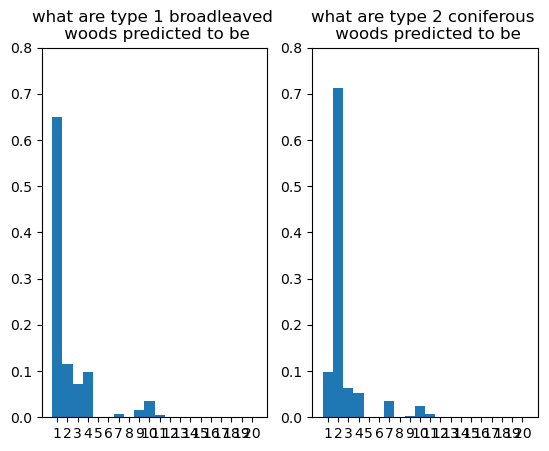

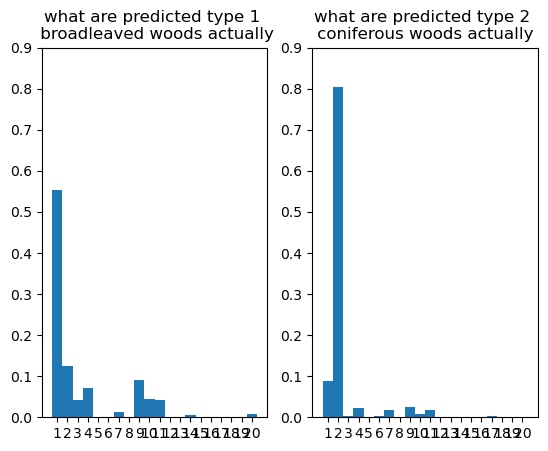

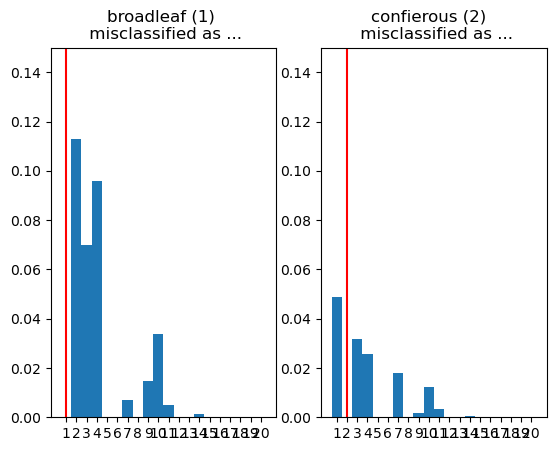

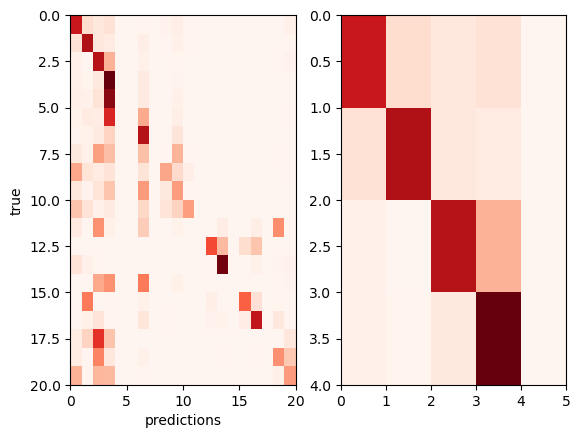

In [7]:
y_pred = run_model(clf,X_train,y_train,X_test,y_test)
woodland_plots(y_pred,y_test)
miscat_plots(y_pred,y_test)
confusion_plots(y_pred,y_test)

test set accuracy 0.6854
correctly classified woodland 0.7945
incorrctly classified as woodland 0.2085


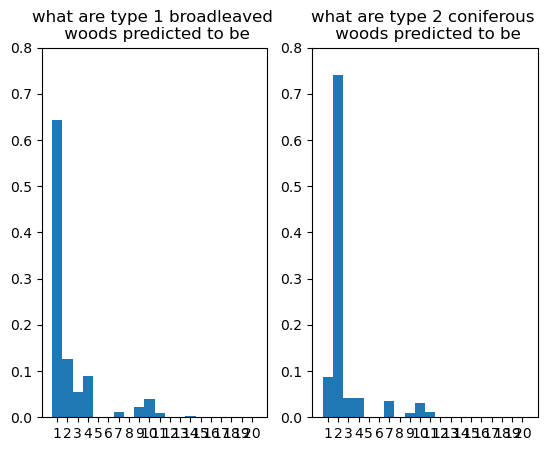

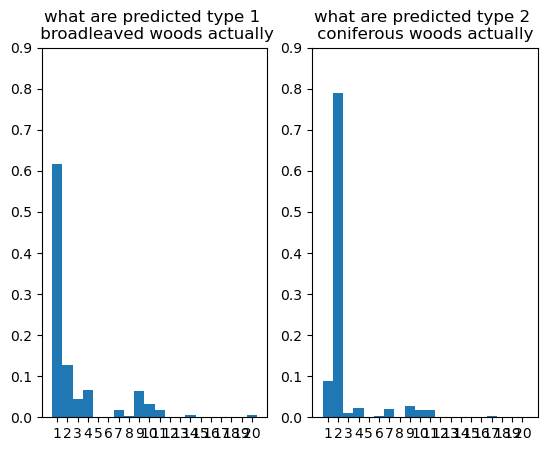

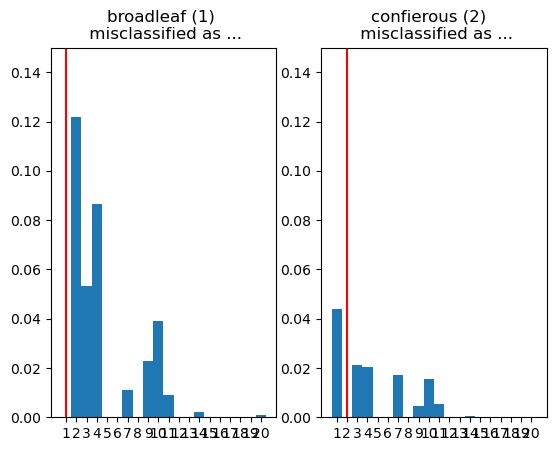

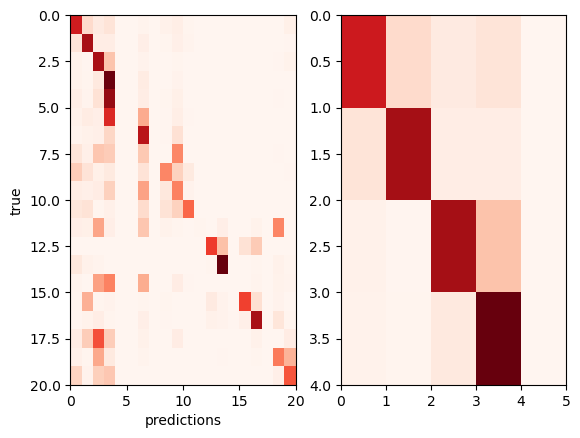

In [8]:
clf = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=100)
y_pred = run_model(clf,X_train,y_train,X_test,y_test)
woodland_plots(y_pred,y_test)
miscat_plots(y_pred,y_test)
confusion_plots(y_pred,y_test)

test set accuracy 0.6542
correctly classified woodland 0.7816
incorrectly classified as woodland 0.2471


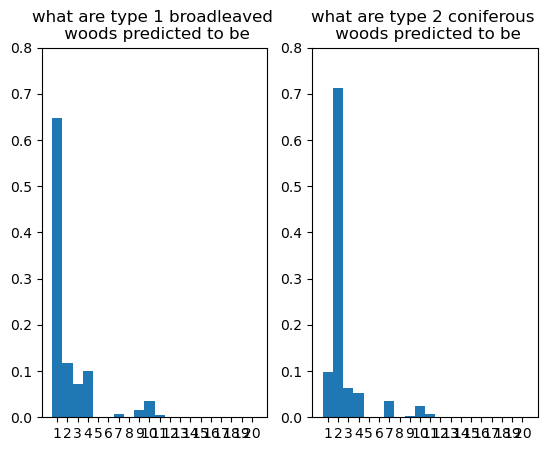

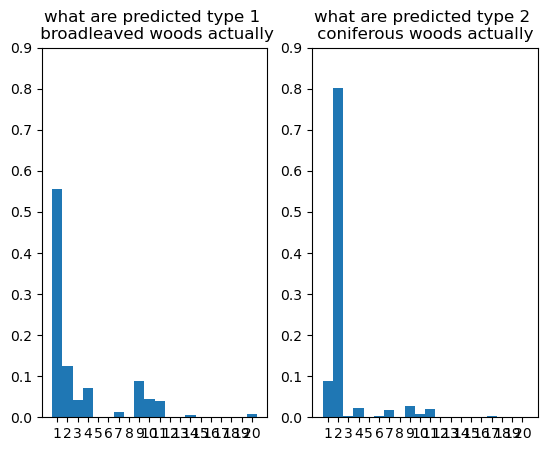

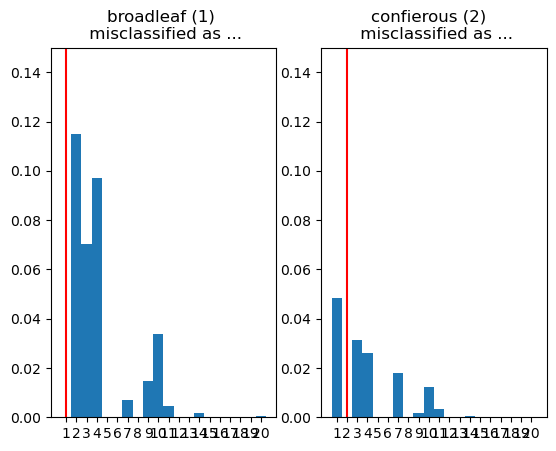

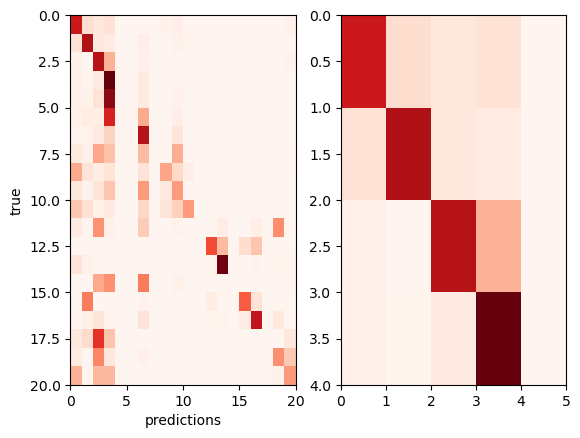

In [9]:
clf = RandomForestClassifier(max_depth=10, random_state=0,n_estimators=500)
y_pred = run_model(clf,X_train,y_train,X_test,y_test)
woodland_plots(y_pred,y_test)
miscat_plots(y_pred,y_test)
confusion_plots(y_pred,y_test)

test set accuracy 0.6872
correctly classified woodland 0.7953
incorrectly classified as woodland 0.2056


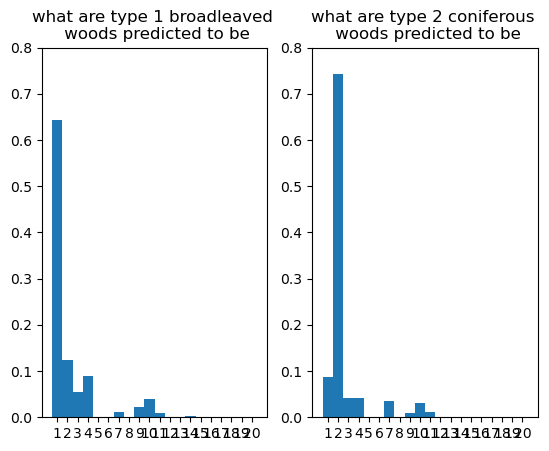

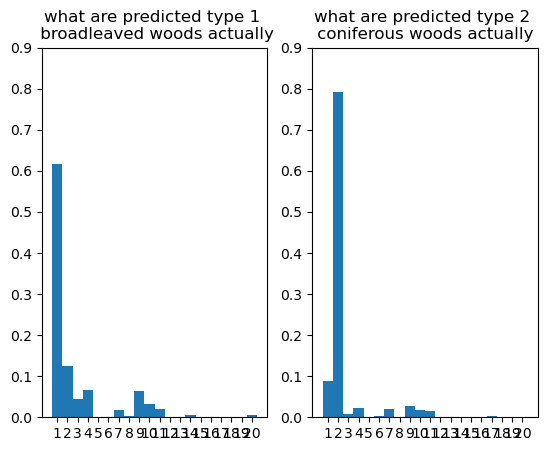

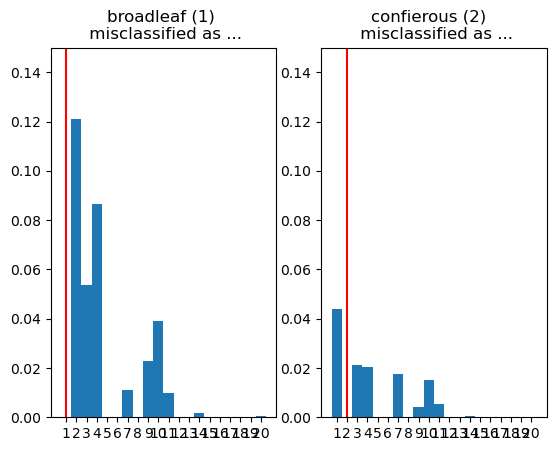

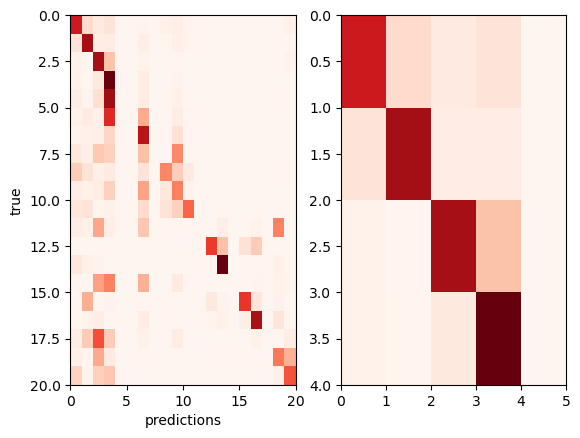

In [10]:
clf = RandomForestClassifier(max_depth=100, random_state=0,n_estimators=200)
y_pred = run_model(clf,X_train,y_train,X_test,y_test)
woodland_plots(y_pred,y_test)
miscat_plots(y_pred,y_test)
confusion_plots(y_pred,y_test)

Used 40% system memory

test set accuracy 0.6875
correctly classified woodland 0.7962
incorrectly classified as woodland 0.2054


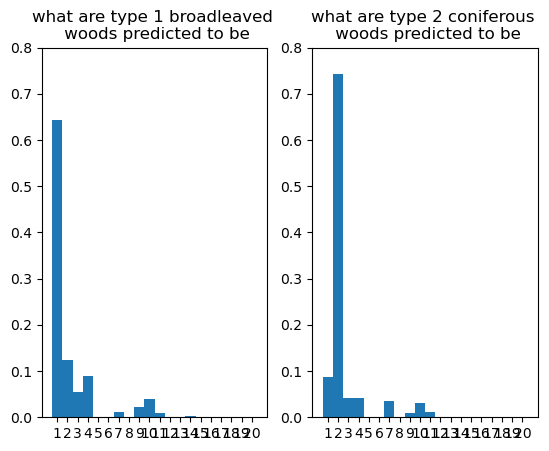

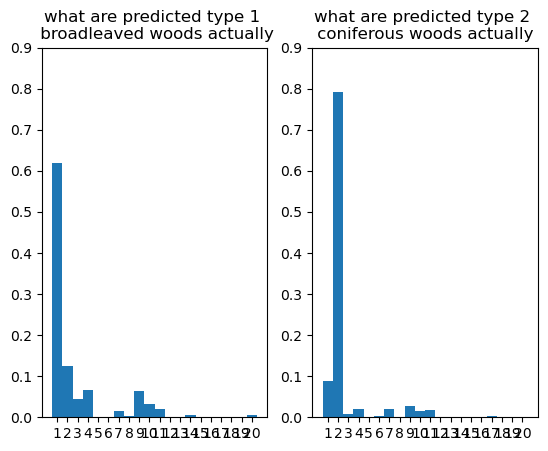

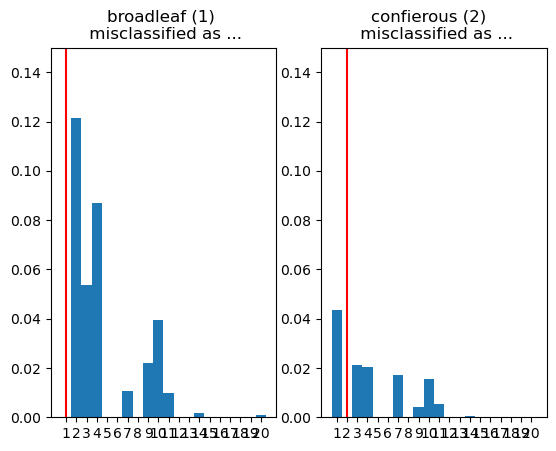

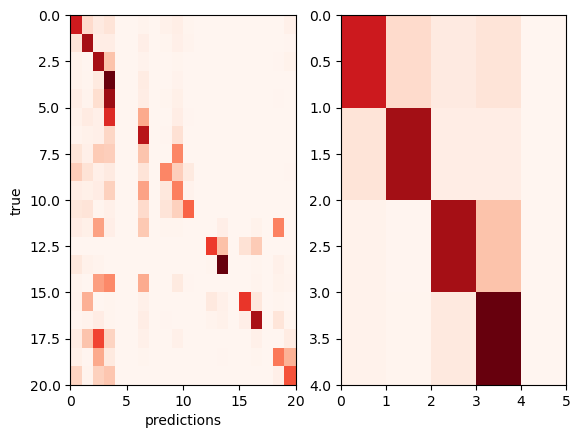

In [11]:
from random_forest_running_funcs import run_model
clf = RandomForestClassifier(max_depth=200, random_state=0,n_estimators=250)
y_pred = run_model(clf,X_train,y_train,X_test,y_test)
woodland_plots(y_pred,y_test)
miscat_plots(y_pred,y_test)
confusion_plots(y_pred,y_test)

used 49% memory

(0.7962037181690361, 0.20544101025061387)